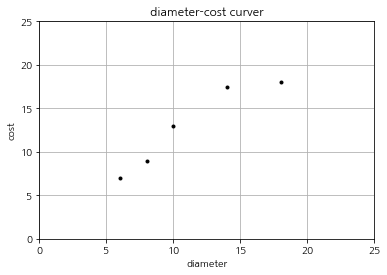

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
def runplt():
    plt.figure()
    plt.title(u'diameter-cost curver')
    plt.xlabel(u'diameter')
    plt.ylabel(u'cost')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张12英寸匹萨价格：$%.2f' % model.predict(np.array([12]).reshape(-1, 1))[0])

预测一张12英寸匹萨价格：$13.68


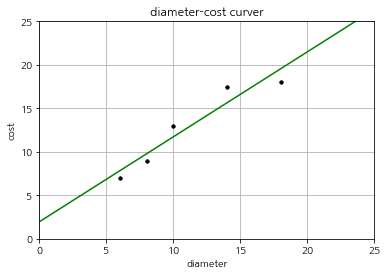

In [3]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

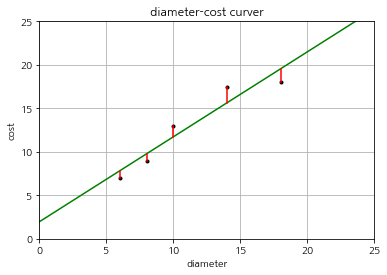

In [4]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)

plt.plot(X2, y2, 'g-')

# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

plt.show()

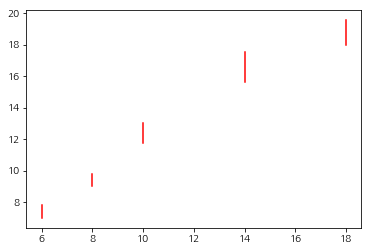

In [5]:
# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

In [6]:
import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))

残差平方和: 1.75


In [7]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]
R-squared: 0.77


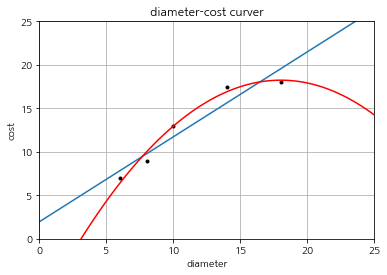

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
1 r-squared 0.809726797707665
2 r-squared 0.8675443656345054


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
# 建立线性回归，并用训练的模型绘图
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('1 r-squared', regressor.score(X_test, y_test))
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

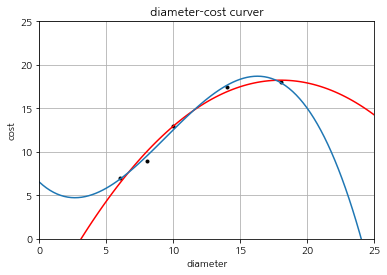

[[1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.400e+01 1.960e+02 2.744e+03]
 [1.000e+00 1.800e+01 3.240e+02 5.832e+03]]
[[1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.600e+01 2.560e+02 4.096e+03]]
2 r-squared 0.8675443656345054
3 r-squared 0.835692415603711


In [9]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))
plt.show()
print(X_train_cubic)
print(X_test_cubic)
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('3 r-squared', regressor_cubic.score(X_test_cubic, y_test))

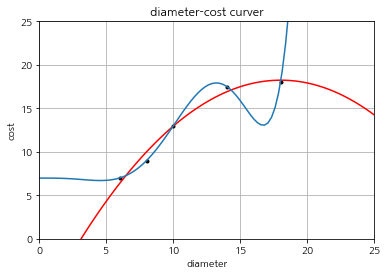

2 r-squared 0.8675443656345054
7 r-squared 0.4919846056865199


In [10]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

seventh_featurizer = PolynomialFeatures(degree=7)
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)
xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('7 r-squared', regressor_seventh.score(X_test_seventh, y_test))